# ASR Whisper

## Read Data from Google Drive

In [3]:
!pip install -U PyDrive2

In [4]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
import librosa
import numpy as np

# read audio as list
audio_folder_id = '1mhLhKCNLgvZgABVQzoe6z7_rQ_FjBm2z' # ./audio
audio_list = drive.ListFile({'q': f"'{audio_folder_id}' in parents and trashed=false"}).GetList()

## Sorted by file_name
def extract_number(filename):
    return int(filename.split('.')[0])

wav_files =  sorted(
    [file['title'] for file in audio_list if file['title'].endswith('.wav')],
    key=extract_number
    )
print(f'file count: {len(wav_files)}')
print(wav_files[:10])

file count: 742
['19.wav', '23.wav', '121.wav', '156.wav', '218.wav', '1000.wav', '1002.wav', '1074.wav', '1089.wav', '1092.wav']


File name: 19.wav


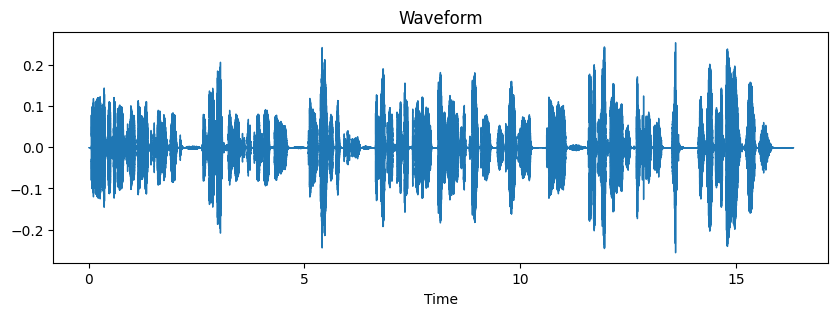

Mean amplitude: 0.017376938834786415

Zero rate: 8.696% ( 68167/783888 )


In [11]:
import librosa.display
import matplotlib.pyplot as plt

def draw_wavform(wav_file_name, audio_array, sr):
  print(f'File name: {wav_file_name}')

  plt.figure(figsize=(10, 3))
  librosa.display.waveshow(audio_array, sr=sr)
  plt.title("Waveform")
  plt.show()

  print(f'Mean amplitude: {np.mean(np.abs(audio_array))}\n')

  num_zeros = np.sum(audio_array == 0)
  print(f'Zero rate: {round(num_zeros * 100 / len(audio_array), 3)}% ( {num_zeros}/{len(audio_array)} )')
  return None

def get_wav_file(index, show):
    if wav_files:
        wav_file_name = wav_files[index]

        file_obj = [file for file in audio_list if file['title'] == wav_file_name][0]
        file_obj.GetContentFile(wav_file_name)

        audio_array, sr = librosa.load(wav_file_name, sr=None)

        if show:
          draw_wavform(wav_file_name, audio_array, sr)

        return {
            "audio": {
                "array": audio_array.tolist(),
                "file_id": int(wav_file_name.split('.')[0]),
                "sampling_rate": sr,
                "duration": librosa.get_duration(y=audio_array, sr=sr)
            }
        }

    else:
        print("No wav files found.")
        return None

a = get_wav_file(0, 1)

In [7]:
# read task1_answer.txt
ans_folder_id = '19e0O5TdXkfpwmE8dq7b4IjOITNd1zFAN' # ./Training_Dataset_01
file_list = drive.ListFile({'q': f"'{ans_folder_id}' in parents and trashed=false"}).GetList()

ans_file_name = 'task1_answer.txt'
answer_files = [file for file in file_list if file['title'] == ans_file_name]
if answer_files:
  answer_file = answer_files[0]
  answer_file.GetContentFile(ans_file_name)
  with open(ans_file_name, 'r', encoding='utf-8') as f:
    lines = f.readlines()  # Read all lines into a list
    print(f'Line count: {len(lines)}\n')  # Output the total number of lines
else:
  print(f"Error: File {ans_file_name} not found.")


def get_answer(index):
  if 0 <= index < len(lines):
    line = lines[index].strip()
    parts = line.split("\t", 1)
    return {
      "ans_id":parts[0],
      "sentence": parts[1]
    }
  else:
    print(f"Error: Index {index} is out of range. Total lines: {len(lines)}")
  return None


get_answer(1)

Line count: 742



{'ans_id': '23',
 'sentence': "Yeah, I imagine it would — sorry, go ahead. So it's supposed to work immediately, right? Yep. So we'll see if I'm productive tomorrow. I hope I'm productive today. I've actually been trying to plan. If I do the titles today, then I can do my laundry tomorrow. Right. I probably could bring my computer and do titles while I'm doing my laundry. If I was — but I won't do that."}

## Create Dataset
```python
{
  "audio": {
    "array": [0.803150659427047e-05,
          0.0002169541548937559,
          0.0003004224272444844,
          0.00028273859061300755,
          0.00016738526755943894,
          0.0343711841851473e-05, ...],
    "file_id": 19,
    "sampling_rate": 48000
  },
  "ans_id": 19,
  "sentence": "Any overture of something that's kind of like a little white flag or peace offering to just get a week of peace, I'm not talking about permanent "I'm going to placate and cow tow to you and to talk my needs in other..." No. Just talking about lets..."
}
```

### 不能全跑，Google Colab RAM 不夠多

In [17]:
def combine_dict(index):
  audio = get_wav_file(index, 0)
  answer = get_answer(index)
  if str(audio['audio']['file_id']) != str(answer['ans_id']):
    print(f"ID mismatched:{audio['audio']['file_id']}/{answer['ans_id']}")
    return None
  return {
    "audio": audio,
    "ans_id": answer['ans_id'],
    "sentence": answer['sentence']
  }

combine_dict(0)

{'audio': {'audio': {'array': [0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
 

## Model Import
openai/whisper-tiny + whisper-timestamped

## Pre-evaluate

## Dataset

## Finetune decoder only

## Training & args

## Output